In [1]:
import math
import random
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
%matplotlib inline
from matplotlib.pyplot import figure

In [2]:
data1 = {'Probability': np.ones(5)*0.2,
        'Arm1': [0, 0.1, 0.15, 0.3, 0.4],
        'Arm2': [0.15, 0.24, 0.34, 0.4, 0.45],
        'Arm3': [0.23, 0.52, 0.62, 0.81, 1],
        'Arm4': [0.21, 0.50, 0.60, 0.79, 0.98], #arm4 has similar prob dist to arm3
        'Arm5': [0, 0.1, 0.15, 0.3, 0.4], #arm5 has same prob dist as arm1
        'Arm6': [0.30, 0.48, 0.68, 0.8, 0.9] #arm6 is dependent on arm2, it's double arm2
       }

df1 = pd.DataFrame(data1)
df1

,Probability,Arm1,Arm2,Arm3,Arm4,Arm5,Arm6
0,0.2,0.00,0.15,0.23,0.21,0.00,0.30
1,0.2,0.10,0.24,0.52,0.50,0.10,0.48
2,0.2,0.15,0.34,0.62,0.60,0.15,0.68
3,0.2,0.30,0.40,0.81,0.79,0.30,0.80
4,0.2,0.40,0.45,1.00,0.98,0.40,0.90


Text(0.5, 1.0, 'Distribution of Rewards for Each Arm')

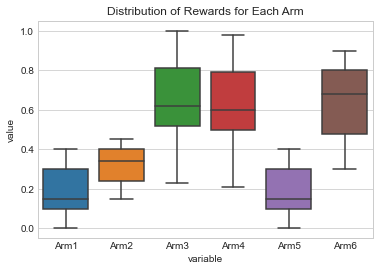

In [3]:
ax = sns.boxplot(x="variable", y="value", data=pd.melt(df1[['Arm1','Arm2','Arm3','Arm4','Arm5','Arm6']]))
plt.title("Distribution of Rewards for Each Arm")

In [4]:
#e.g. trying arms with different types of distributions
arr = np.arange(0.01, 1.01, 0.01) #probability dist values
np.random.choice(arr)     #one random value within probability dist

0.19

In [5]:
np.arange(0.01, 1.01, 0.01)

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [6]:
arm1R = [] #arm1 rewards list
arm2R = [] #arm2 rewards list
arm3R = [] #arm3 rewards list
arm4R = [] #arm4 rewards list
arm5R = [] #arm5 rewards list
arm6R = [] #arm6 rewards list

#arm1 dist
for i in range(1000):
    if np.random.choice(arr) < 0.21:  
        arm1 = 0    #20% chance
    elif np.random.choice(arr) < 0.41:
        arm1 = 0.1    #20% chance
    elif np.random.choice(arr) < 0.61:
        arm1 = 0.15    #20% chance
    elif np.random.choice(arr) < 0.81:
        arm1 = 0.3    #20% chance
    elif np.random.choice(arr) < 1.01:  
        arm1 = 0.4    #20% chance
    arm1R = np.append(arm1R, arm1)
#print(arm1R)

#arm2 dist
for i in range(1000):
    if np.random.choice(arr) < 0.21:  
        arm2 = 0.15    #20% chance
    elif np.random.choice(arr) < 0.41:
        arm2 = 0.24    #20% chance
    elif np.random.choice(arr) < 0.61:
        arm2 = 0.34    #20% chance
    elif np.random.choice(arr) < 0.81:
        arm2 = 0.4    #20% chance
    elif np.random.choice(arr) < 1.01:  
        arm2 = 0.45    #20% chance
    arm2R = np.append(arm2R, arm2)

#arm3 dist
for i in range(1000):
    if np.random.choice(arr) < 0.21:  
        arm3 = 0.2    #20% chance
    elif np.random.choice(arr) < 0.41:
        arm3 = 0.5    #20% chance
    elif np.random.choice(arr) < 0.61:
        arm3 = 0.6    #20% chance
    elif np.random.choice(arr) < 0.81:
        arm3 = 0.8    #20% chance
    elif np.random.choice(arr) < 1.01:  
        arm3 = 1    #20% chance
    arm3R = np.append(arm3R, arm3)

#arm4 dist
for i in range(1000):
    if np.random.choice(arr) < 0.21:  
        arm4 = 0.2    #20% chance
    elif np.random.choice(arr) < 0.41:
        arm4 = 0.5    #20% chance
    elif np.random.choice(arr) < 0.61:
        arm4 = 0.6    #20% chance
    elif np.random.choice(arr) < 0.81:
        arm4 = 0.8    #20% chance
    elif np.random.choice(arr) < 1.01:  
        arm4 = 1    #20% chance
    arm4R = np.append(arm4R, arm4)

#arm5 dist
for i in range(1000):
    if np.random.choice(arr) < 0.21:  
        arm5 = 0    #20% chance
    elif np.random.choice(arr) < 0.41:
        arm5 = 0.1    #20% chance
    elif np.random.choice(arr) < 0.61:
        arm5 = 0.15    #20% chance
    elif np.random.choice(arr) < 0.81:
        arm5 = 0.3    #20% chance
    elif np.random.choice(arr) < 1.01:  
        arm5 = 0.4    #20% chance
    arm5R = np.append(arm5R, arm5)
    
#arm6 dist
for i in range(1000):
    if np.random.choice(arr) < 0.21:  
        arm6 = 0.3    #20% chance
    elif np.random.choice(arr) < 0.41:
        arm6 = 0.48    #20% chance
    elif np.random.choice(arr) < 0.61:
        arm6 = 0.68    #20% chance
    elif np.random.choice(arr) < 0.81:
        arm6 = 0.8    #20% chance
    elif np.random.choice(arr) < 1.01:  
        arm6 = 0.9    #20% chance
    arm6R = np.append(arm6R, arm6)


In [7]:
data2 = {'Round': np.arange(1,1001),
        'Arm1 Reward': arm1R,
        'Arm2 Reward': arm2R,
        'Arm3 Reward': arm3R,
        'Arm4 Reward': arm4R, 
        'Arm5 Reward': arm5R,
        'Arm6 Reward': arm6R,
       }

df2 = pd.DataFrame(data2)
df2.head(10)  #shows first 10 rounds out of 1000

,Round,Arm1 Reward,Arm2 Reward,Arm3 Reward,Arm4 Reward,Arm5 Reward,Arm6 Reward
0,1,0.00,0.40,0.2,0.8,0.00,0.68
1,2,0.10,0.24,0.6,0.6,0.15,0.80
2,3,0.10,0.34,0.5,0.5,0.30,0.80
3,4,0.10,0.24,0.2,0.6,0.00,0.80
4,5,0.15,0.34,0.5,0.8,0.15,0.48
5,6,0.15,0.15,0.5,0.5,0.10,0.68
6,7,0.15,0.40,0.2,0.5,0.10,0.48
7,8,0.10,0.15,0.8,0.2,0.30,0.68
8,9,0.15,0.34,0.8,0.6,0.10,0.48
9,10,0.00,0.24,0.8,0.2,0.15,0.48


In [8]:
k=6
K=3

math.ceil(k/K)

2

In [10]:
#implementing CUCB, 1000 runs
#CUCB for K=2 arms being selected
rounds = len(df2.index) # number of rounds; 
k = 6 # number of arms
mu = 0 # initialize to 0, the empirical mean
mu_arr = []
N = np.zeros(k) # number of times a given arm has been selected before current round; initialize to 0 as no arm selected yet
rewardSum = np.zeros(k)
hist_UCB_rewards = [] #stores history of UCB CHOSEN rewards
alpha = 0.6
beta = 0.7
r_mu = 0
opt_mu = 0

for t in range(rounds):
    UCB_Values = np.zeros(k) #array holding ucb values. re-initialize to 0 at start of each round 
    temp_UCB_Values = np.zeros(k)
    arm_selected = 0
    for a in range(k):
        if (N[a] > 0):
            #calculate UCB below
            mu = rewardSum[a]/N[a]
            ucb_value = mu + math.sqrt(3/2*math.log(t)/N[a]) 
            UCB_Values[a] = ucb_value
        elif (N[a] == 0): #i.e. if N is 0 for arm a, then allow exploration of that arm
            UCB_Values[a] = 1e500 #infinity
        temp_UCB_Values[a] = UCB_Values[a] #this is a copy of UCB_Values[a], to be modified below to find runner-up arms
        
    arm1_selected = np.argmax(UCB_Values) #NB: argmax gives index of max value in a list/array
    temp_UCB_Values[arm1_selected] = 0
    arm2_selected = np.argmax(temp_UCB_Values)
    
    #update Values as of round t
    reward = df2.values[t, arm1_selected+1] + df2.values[t, arm2_selected+1]
    r_mu = reward/2 #reward divide by K
    arm3_mean = np.mean([0.23, 0.52, 0.62, 0.81, 1])
    arm6_mean = np.mean([0.30, 0.48, 0.68, 0.8, 0.9])
    opt_mu = (arm3_mean+arm6_mean)/2 #divide by K
    if r_mu < alpha*opt_mu: #superarm S is bad if the reward sum from S is < alpha*mean Reward of Optimal Arm.
        #this superarm is a bad superarm
        #only increment the simple arm within this superarm that has min N
        if N[arm1_selected] < N[arm2_selected]:
            N[arm1_selected] += 1
        else:
            N[arm2_selected] += 1
    #else if superarm S is not bad then don't increment N at all for any simple arms within that superarm
    
    rewardSum[arm1_selected] += df2.values[t, arm1_selected+1]  #will need loop here to do this K times
    rewardSum[arm2_selected] += df2.values[t, arm2_selected+1]
    hist_UCB_rewards.append(reward)
    UCB_cumu_reward = np.cumsum(hist_UCB_rewards)
    UCB_cumu_reward_norm = UCB_cumu_reward/2 #UCB_cumu_reward divide by K
    UCB_total_reward = sum(hist_UCB_rewards)
    UCB_total_reward_norm = UCB_total_reward/2 #UCB_total_reward divide by K


In [13]:
UCB_total_reward_norm

524.1150000000016

In [22]:
arm3_mean = np.mean([0.23, 0.52, 0.62, 0.81, 1])
arm6_mean = np.mean([0.30, 0.48, 0.68, 0.8, 0.9])
opt_mu = (arm3_mean+arm6_mean)/2
opt_mu
rewardSum

array([3.2500e+00, 3.9000e-01, 5.1810e+02, 9.0000e-01, 7.0000e-01,
       5.6156e+02])

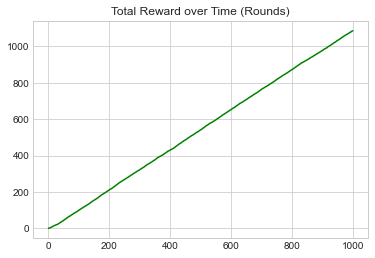

Text(0.5, 1.0, 'Number of times Each Arm was Selected')

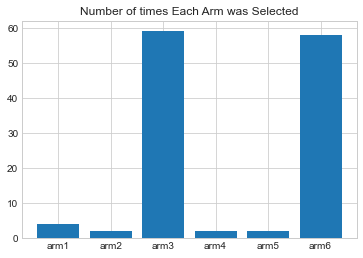

In [23]:
#reward
reward_arr1 = UCB_cumu_reward
plt.plot(reward_arr1,color = 'g')
plt.title("Total Reward over Time (Rounds)")
plt.show()

#num times arms selected
plt.bar(['arm1','arm2','arm3','arm4','arm5', 'arm6'], N) #NB: N calculated according to CUCB (pg 5 in Superarm paper)
plt.title("Number of times Each Arm was Selected")

Text(0.5, 1.0, 'UCB Values for Each Arm')

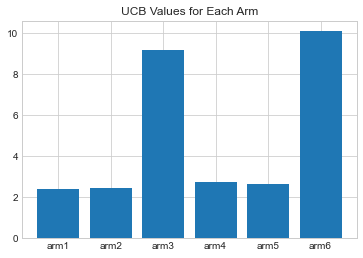

In [24]:
plt.bar(['arm1','arm2','arm3','arm4','arm5', 'arm6'], UCB_Values)
plt.title("UCB Values for Each Arm")

Text(0.5, 1.0, 'Quantity that Each Arm within Superarm Contributed to Total Reward')

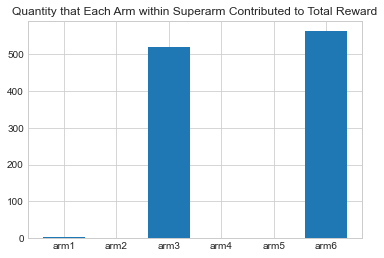

In [25]:
#how much each arm contributed to the reward
plt.bar(['arm1','arm2','arm3','arm4','arm5', 'arm6'], rewardSum)
plt.title("Quantity that Each Arm within Superarm Contributed to Total Reward")

In [62]:
#implementing CUCB, 1000 runs
#CUCB for K=3 arms being selected
rounds = len(df2.index) # number of rounds; 
k = 6 # number of arms
mu = 0 # initialize to 0, the empirical mean
mu_arr = []
N = np.zeros(k) # number of times a given arm has been selected before current round; initialize to 0 as no arm selected yet
rewardSum = np.zeros(k)
hist_UCB_rewards = [] #stores history of UCB CHOSEN rewards
alpha = 1
beta = 1
r_mu = 0
opt_mu = 0

for t in range(rounds):
    UCB_Values = np.zeros(k) #array holding ucb values. re-initialize to 0 at start of each round 
    temp_UCB_Values = np.zeros(k)
    arm_selected = 0
    for a in range(k):
        if (N[a] > 0):
            #calculate UCB below
            mu = rewardSum[a]/N[a]
            ucb_value = mu + math.sqrt(3/2*math.log(t)/N[a]) 
            UCB_Values[a] = ucb_value
        elif (N[a] == 0): #i.e. if N is 0 for arm a, then allow exploration of that arm
            UCB_Values[a] = 1e500 #infinity
        temp_UCB_Values[a] = UCB_Values[a] #this is a copy of UCB_Values[a], to be modified below to find runner-up arms
        
    arm1_selected = np.argmax(UCB_Values) #NB: argmax gives index of max value in a list/array
    temp_UCB_Values[arm1_selected] = 0
    arm2_selected = np.argmax(temp_UCB_Values)
    temp_UCB_Values[arm2_selected] = 0
    arm3_selected = np.argmax(temp_UCB_Values)
    
    #update Values as of round t
    reward = df2.values[t, arm1_selected+1] + df2.values[t, arm2_selected+1] + df2.values[t, arm3_selected+1]
    r_mu = reward/3 #reward divide by K
    arm3_mean = np.mean([0.23, 0.52, 0.62, 0.81, 1])
    arm4_mean = np.mean([0.21, 0.5, 0.6, 0.79, 0.98])
    arm6_mean = np.mean([0.30, 0.48, 0.68, 0.8, 0.9])
    opt_mu = (arm3_mean+arm4_mean+arm6_mean)/3 #divide by K
    if r_mu < alpha*opt_mu: #superarm S is bad if the reward sum from S is < alpha*mean Reward of Optimal Arm.
        #this superarm is a bad superarm
        #only increment the simple arm within this superarm that has min N
        if N[arm1_selected] < N[arm2_selected]:
            N[arm1_selected] += 1
        else:
            N[arm2_selected] += 1
    #else if superarm S is not bad then don't increment N at all for any simple arms within that superarm
    
    rewardSum[arm1_selected] += df2.values[t, arm1_selected+1]  #will need loop here to do this K times
    rewardSum[arm2_selected] += df2.values[t, arm2_selected+1]
    rewardSum[arm3_selected] += df2.values[t, arm3_selected+1]
    hist_UCB_rewards.append(reward)
    UCB_cumu_reward = np.cumsum(hist_UCB_rewards)
    UCB_cumu_reward_norm = UCB_cumu_reward/3 #UCB_cumu_reward divide by K
    UCB_total_reward = sum(hist_UCB_rewards)
    UCB_total_reward_norm = UCB_total_reward/3 #UCB_total_reward divide by K

In [63]:
arm3_mean = np.mean([0.23, 0.52, 0.62, 0.81, 1])
arm4_mean = np.mean([0.21, 0.5, 0.6, 0.79, 0.98])
arm6_mean = np.mean([0.30, 0.48, 0.68, 0.8, 0.9])
opt_mu = (arm3_mean+arm4_mean+arm6_mean)/3
opt_mu

0.628

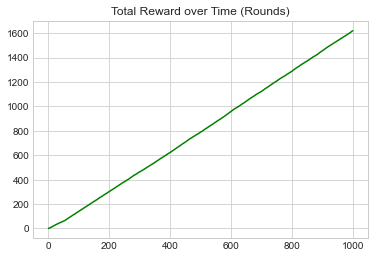

Text(0.5, 1.0, 'Number of times Each Arm was Selected')

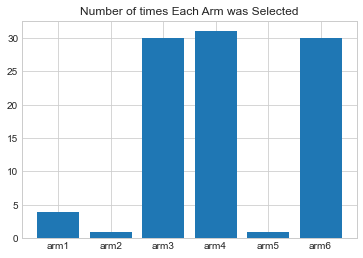

In [64]:
#reward
reward_arr1 = UCB_cumu_reward
plt.plot(reward_arr1,color = 'g')
plt.title("Total Reward over Time (Rounds)")
plt.show()

#num times arms selected
plt.bar(['arm1','arm2','arm3','arm4','arm5', 'arm6'], N) #NB: N calculated according to CUCB (pg 5 in Superarm paper)
plt.title("Number of times Each Arm was Selected")

Text(0.5, 1.0, 'UCB Values for Each Arm')

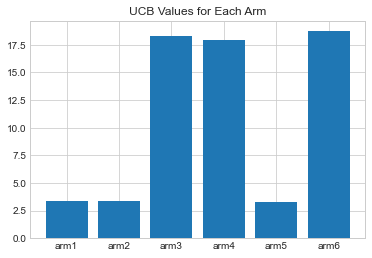

In [65]:
plt.bar(['arm1','arm2','arm3','arm4','arm5', 'arm6'], UCB_Values)
plt.title("UCB Values for Each Arm")

Text(0.5, 1.0, 'Quantity that Each Arm within Opt Superarm Contributed to Total Reward')

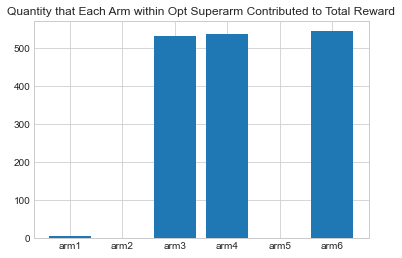

In [66]:
#how much each arm within opt superarm contributed to the reward
plt.bar(['arm1','arm2','arm3','arm4','arm5', 'arm6'], rewardSum)
plt.title("Quantity that Each Arm within Opt Superarm Contributed to Total Reward")

In [12]:
#implementing CUCB, 1000 runs
#CUCB for K arms being selected
rounds = len(df2.index) # number of rounds
K = 3 # window size, num of arms within a window
k = 6 # number of arms
mu = 0 # initialize to 0, the empirical mean
N = np.zeros(k) # number of times a given arm has been selected before current round; initialize to 0 as no arm selected yet
rewardSum = np.zeros(k)
hist_UCB_rewards = [] #stores history of UCB CHOSEN rewards
mu_arr = np.zeros(k)  #expectation vector; array of mu for each simple arm
alpha = 0.6
beta = 0.7
r_mu = 0     #expected reward from a certain superarm
r_mu_arr = []   #array of expected rewards for each superarm S
Rt_S = 0      #sum of K arms' rewards in round t
opt_mu = 0  #max(r_mu_arr)

#initialize all the simple arms in a separate chunk of code from the rest of algorithm, acc. line 2 in pseudocode
for i in range(math.ceil(k/K)):
    UCB_Values = np.zeros(k) #array holding ucb values. re-initialize to 0 at start of each round
    arm_selected = 0
    for j in np.arange(K):
        #pull superarm consisting of K arms
        arm_selected = j
        #N[arm_selected] += 1
        #reward = df2.values[i, arm_selected+1]
        #rewardSum[arm_selected] += reward
    N[arm_selected] += 1
    reward = df2.values[i, arm_selected+1]
    rewardSum[arm_selected] += reward
    i = i+K  #disjoint window, shifts right by K simple arms
        
#suppose CUCB is working
#remaining rounds, given that math.ceil(k/K) rounds already completed in initialization
for t in range(rounds-math.ceil(k/K)):
    UCB_Values = np.zeros(k) #array holding ucb values. re-initialize to 0 at start of each round
    arm_selected = 0
    for a in range(k):
        if (N[a] > 0):
            mu = rewardSum[a]/N[a]
            mu_arr[a] = mu #expectation vector being updated
            ucb_value = mu + math.sqrt(3/2*math.log(t)/N[a]) 
            UCB_Values[a] = ucb_value
        elif (N[a] == 0): #i.e. if N is 0 for arm a, then set ucb value to infinity to allow exploration of arm a
            #ensures initialization of all k arms
            UCB_Values[a] = 1e500 #infinity
    arm_selected = np.argmax(UCB_Values)


#updates
if r_mu < alpha*opt_mu:
    #this superarm is a bad superarm
    #only increment the simple arm within this superarm that has min N
    n_arr = []
    for r in range(K):
        #find the simple with the min N,increment that simple arm's N value
        n_arr = np.append(n_arr, N[r]) #NB: N[K*0+r] = N[r] only for superarm 1. for superarm 2, N[K*1+r]. superarm 3, N[K*2+r]
        N[arm_selected] = min(n_arr)+1
#else:
    #this superarm is not a bad superarm
    #do not incremement N for any of the simple arms within this superarm



ValueError: math domain error

In [ ]:
#regret = alpha*beta*optimal_superarm_mean_reward*t_rounds - sum of cucb_rewards yielded over t rounds

regret = rounds*alpha*beta*opt_mu - UCB_total_reward
print("Total regret after N rounds: ", regret)

regret_arr = alpha*beta*opt_mu*np.arange(rounds) - UCB_cumu_reward
regret_arr

plt.plot(regret_arr,color = 'b')
plt.show()

In [ ]:
for t in range(rounds):
    UCB_Values = np.zeros(k) #array holding ucb values. re-initialize to 0 at start of each round
    arm_selected = 0
    for a in range(k):
        if (N[a] > 0):
            mu = rewardSum[a]/N[a]
            mu_arr[a] = mu #expectation vector being updated
            ucb_value = mu + math.sqrt(3/2*math.log(t)/N[a]) 
            UCB_Values[a] = ucb_value
        elif (N[a] == 0): #i.e. if N is 0 for arm a, then set ucb value to infinity to allow exploration of arm a
            #ensures initialization of all k arms
            UCB_Values[a] = 1e500 #infinity
        
    #update Values as of round t
    #superarm S is bad if the reward sum from S is < alpha*opt_mu.
    #if superarm S is bad then increment N as follows:
    if N[arm1_selected] < N[arm2_selected]:
        N[arm1_selected] += 1
    else:
        N[arm2_selected] += 1
    #if superarm S is not bad then don't increment N at all:
    reward = df2.values[t, arm1_selected+1] + df2.values[t, arm2_selected+1]
    rewardSum[arm1_selected] += df2.values[t, arm1_selected+1]  #will need loop here to do this K times
    rewardSum[arm2_selected] += df2.values[t, arm2_selected+1]
    hist_UCB_rewards.append(reward)
    UCB_cumu_reward = np.cumsum(hist_UCB_rewards)
    UCB_total_reward = sum(hist_UCB_rewards)

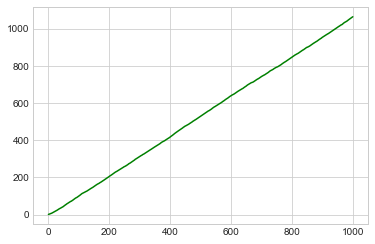

In [262]:
reward_arr1 = UCB_cumu_reward

plt.plot(reward_arr1,color = 'g')
plt.show()

Text(0.5, 1.0, 'Number of times Each Arm was Selected')

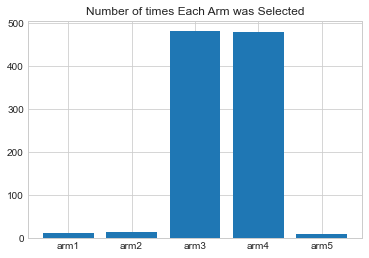

In [263]:
plt.bar(['arm1','arm2','arm3','arm4','arm5'], N) #NB: N is calculated according to CUCB algorithm (page 5 in Superarm paper)
plt.title("Number of times Each Arm was Selected")

In [ ]:
#regret = alpha*beta*optimal_superarm_mean_reward*t_rounds - sum of cucb_rewards yielded over t rounds

regret = opt_mu*rounds - UCB_total_reward
print("Total regret after N rounds: ", regret)

regret_arr = 0.7*np.arange(rounds) - UCB_cumu_reward
regret_arr

plt.plot(regret_arr,color = 'b')
plt.show()

In [212]:
#implementing CUCB, 1000 runs
#CMAB for any number K arms selected

rounds = len(df.index) # number of rounds; 
k = 10 # number of arms
mu = 0 # initialize to 0, the empirical mean
N = np.zeros(k) # number of times a given arm has been selected before current round; initialize to 0 as no arm selected yet
rewardSum = np.zeros(k)
hist_UCB_rewards = [] #stores history of UCB CHOSEN rewards

for t in range(rounds):
    UCB_Values = np.zeros(k) #array holding ucb values. re-initialize to 0 at start of each round
    arm_selected = 0
    for a in range(k):
        if (N[a] > 0):
            #calculate UCB below
            mu = rewardSum[a]/N[a]
            ucb_value = mu + math.sqrt(3/2*math.log(t)/N[a]) 
            UCB_Values[a] = ucb_value
        elif (N[a] == 0): #i.e. if N is 0 for arm a, then allow exploration of that arm
            UCB_Values[a] = 1e500 #infinity
        temp_UCB_Values[a] = UCB_Values[a]
    
    for i in range(K): #K is the num of arms we are selecting (window size)
        for a in range(k): #sort, and take the first K ind
            #take the highest K arms in terms of UCB values
            #need array with indeces of the K best arms
    arm1_selected = np.argmax(UCB_Values) #NB: argmax gives index of max value in a list/array
    temp_UCB_Values[arm1_selected] = 0
    arm2_selected = np.argmax(temp_UCB_Values)
    
    #update Values as of round t
    N[arm1_selected] += 1 #will need loop here to do this K times
    N[arm2_selected] += 1
    reward = df.values[t, arm1_selected+1] + df.values[t, arm2_selected+1]
    rewardSum[arm1_selected] += df.values[t, arm1_selected+1]  #will need loop here to do this K times
    rewardSum[arm2_selected] += df.values[t, arm2_selected+1]
    hist_UCB_rewards.append(reward)
    UCB_cumu_reward = np.cumsum(hist_UCB_rewards)
    UCB_total_reward = sum(hist_UCB_rewards)

IndentationError: expected an indented block (<ipython-input-212-dbe3899c7e2f>, line 29)